<a href="https://colab.research.google.com/github/williamtbarker/ML4Molecules/blob/main/exercise_1_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Download the Binary labels of blood-brain barrier penetration dataset from moleculenet.org. To get the URL to the CSV file, you can hover over the download link and then copy the link address with right-click. Load the dataset into pandas dataframe and  -
1. analyze distribution of the target values (p_np) in the dataset. Are they evenly distributed?
2. analyze if the dataset contains neutral single molecules or ionic species with counter-ions
3. create a clean dataset with molecular weight of less than 750.




In [4]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv")
df.head()
df.tail()



,num,name,p_np,smiles
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...
2049,2053,azidamfenicol,1,[N+](=NCC(=O)N[C@@H]([C@H](O)C1=CC=C([N+]([O-]...


<Axes: ylabel='Frequency'>

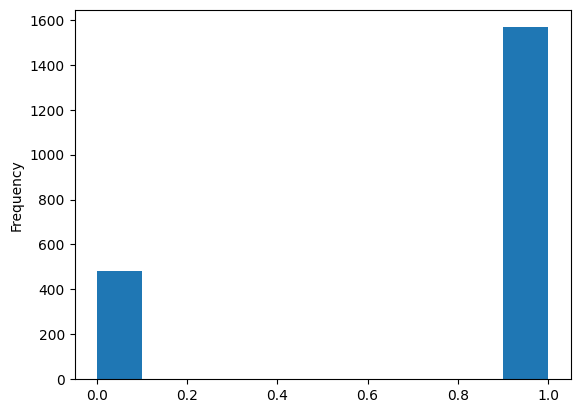

In [3]:
# 1. plot the distribution of target_values
df['p_np'].plot(kind="hist")

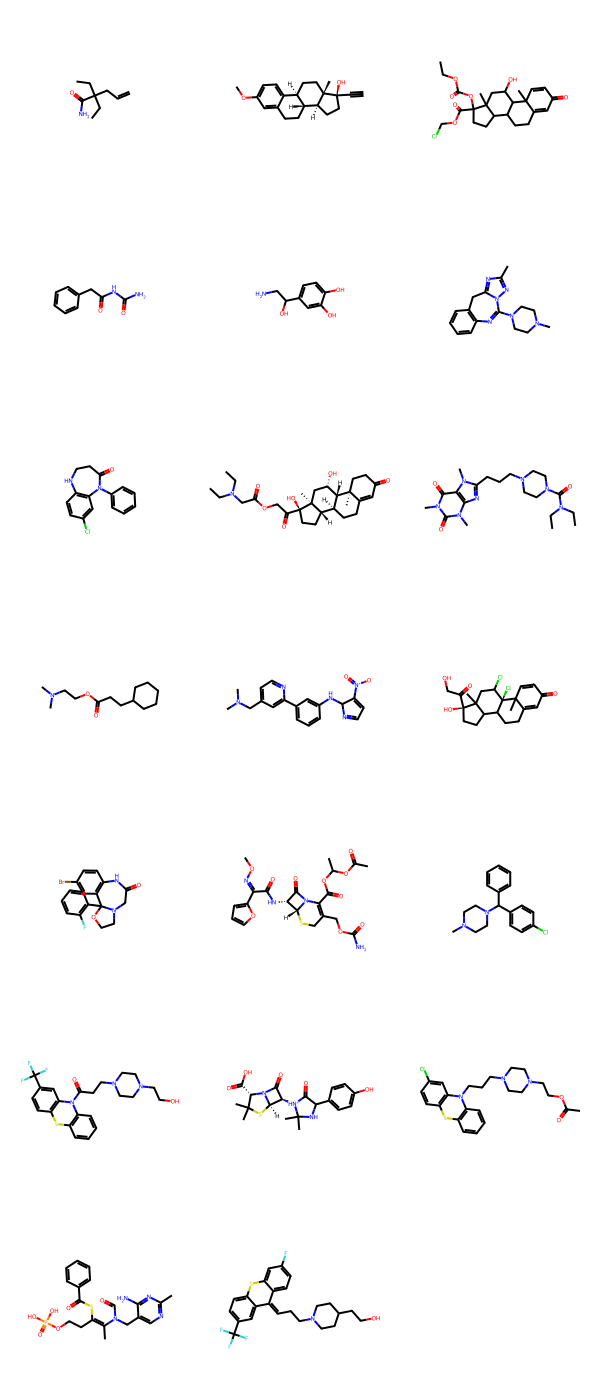

In [9]:
# 2. visualize the 2D structure.
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

# sample the dataframe
sample_df = df.sample(n=20)

# create a list of smiles
smiles_list = sample_df["smiles"].tolist()

# create the RDKit molecule objects with list comprehension
MolsToGridImage([Chem.MolFromSmiles(smile) for smile in smiles_list ])

Hint: you will need to use RDKit and convert smiles to 2D image. You can use the method discussed in the lesson on Dataset or use PandasTools from RDKit. You can find the documentation [here](https://www.rdkit.org/docs/source/rdkit.Chem.PandasTools.html)

In [12]:
# 3. Clean dataset with molecular weight less than 700
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt

# Function to calculate molecular weight from SMILES
def calculate_mol_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return CalcExactMolWt(mol)
    else:
        return None

# Apply the function to the 'smiles' column
df['MW'] = df['smiles'].apply(calculate_mol_weight)

# Filter the DataFrame for molecules with molecular weight less than 700
df_filtered = df[df['MW'] < 700]


[19:37:46] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:37:46] WARNING: not removing hydrogen atom without neighbors
[19:37:46] Explicit valence for atom # 6 N, 4, is greater than permitted
[19:37:46] WARNING: not removing hydrogen atom without neighbors
[19:37:46] WARNING: not removing hydrogen atom without neighbors
[19:37:46] WARNING: not removing hydrogen atom without neighbors
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] Explicit valence for atom # 6 N, 4, is greater than permitted
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] WARNING: not removing hydrogen atom without neighbors
[19:37:47] Explicit valence for atom # 11 N, 4, is greater than pe

Hint: compute the molecular weight using RDKit function and apply pandas filter to get the dataset.

example: `df[df["mol_weight"] < 700]`